# SQUIRREL EXAMPLE

This Jupyter notebook accompanies Chapter 6 of the **book title** and Chapter 1 of the **PhD manuscript**. It compiles all the examples used to illustrate Markov Decision Processes (MDPs). Several of these examples are also solved using algorithms for computing optimal or approximate policies. The notation used in this notebook is consistent with that of the PhD manuscript, though it may differ from the book.

In [1]:
# Load necessary library to run all code 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.ticker as ticker
import random
import pandas as pd
from collections import defaultdict

# Set the seed
seed = 42
np.random.seed(seed)

## 1) Squirrel example as a finite state and action MDP 

### A) The model

Over the course of a week, you observe a squirrel moving from hiding place to hiding place. 
Let $m \in \{1, \cdots, 4\}$ be the set of hiding places. 
You only have one camera and each day you can decide to place it in front of a specific hiding place. 
The aim is to take as many photos of the squirrel as possible over the week. 

The MDP associated to this example is described by

\begin{align*}
    \mathbb{S}&=\{1, \cdots, 4\}, \\
    \mathbb{A}&=\{1, \cdots, 4\}, \\    
    P(s'|s=m,a)&=\sum_{m'=1}^4 p_m^{m'} \mathbb{1}_{\{s'=m'\}}, \\
    c(s,a)&= \mathbb{1}_{a \neq m}.\\
    H&=7.
\end{align*}

Note that in this example, the transition matrix does not depend on the action, the terminal cost is $C=0$, and there are no forbidden actions.

*For the simulations, we initialized the transition matrix to* $P(s'|s=m,a) =
\begin{bmatrix}
0.4 & 0.1 & 0.3 & 0.2 \\
0.25 & 0.25 & 0.25 & 0.25 \\
0.1 & 0.2 & 0.3 & 0.4 \\
0.3 & 0.2 & 0.1 & 0.4
\end{bmatrix}
$

In [2]:
# Define the state space
S = [1, 2, 3, 4]  # Number of sub-states (0 to 7)
H = 7  # Horizon

# Define the action space
A = [1, 2, 3, 4]

# Define transition parameters
P = np.array([
    [0.4, 0.1, 0.3, 0.2],
    [0.25, 0.25, 0.25, 0.25],
    [0.1, 0.2, 0.3, 0.4],
    [0.3, 0.2, 0.1, 0.4]
])

# Transition probabilities
def transition_prob(s, a, s_prime):
    """Compute the transition probability P(s' | s, a) based on the defined MDP."""
    return P[s-1,s_prime-1]

# Transition probabilities
def next_state(s, a):
    """Compute the next state based on the defined MDP."""
    
    s_prime =  np.random.choice([1, 2, 3, 4], p=P[s-1,:])

    return s_prime

# Cost function
def cost(s, a):
    return 1 if a != s else 0


### B) Policies evalation 

Let's introduce three policy to control the process defined above. 
Those three politics are history-independent. 

**Fixed Camera (Deterministic Policy) $\pi_0$**. The camera is placed at the first location and remains there for the entire process without moving.

**Random Movement (Stochastic Policy) $\pi_1$**. The camera moves randomly and looks at one of the four possible hiding spots.

**Tracking the Squirrel (Deterministic Policy) $\pi_2$**. The camera follows the squirrel, always positioning itself wherever the squirrel moves.


In [3]:
def pi_0(s):
    """pi0: Fixed Camera."""
    return 1

def pi_1(s):
    """pi1: Random Movement."""
    return np.random.choice(A)

def pi_2(s):
    """pi2: Track the squirrel."""
    return s

def simulate(policy, s_init=1, horizon=H):
    """Simulate a full trajectory given a fixed policy"""
    s = s_init
    trajectory = []
    actions = []
    costs = []
    
    for _ in range(horizon+1):
        a = policy(s)
        trajectory.append(s)
        actions.append(a)
        costs.append(cost(s, a))
        s = next_state(s, a)
    return trajectory, actions, costs

def estimate_cost(policy, n_sim=5000):
    """Estimate Monte-Carlo cost of a policy"""
    total = []
    for _ in range(n_sim):
        _, _, costs = simulate(policy)
        total.append(sum(costs))
    return np.mean(total), np.std(total) 

def plot_trajectory(trajectory, actions, title="Trajectory"):
    """Plot a trajectory and corresponding actions (both discrete values)."""
    times = range(len(trajectory))

    fig, ax = plt.subplots()
    
    # Plot hiding place
    ax.step(times, trajectory, where='post', color='tab:blue', label='Hiding place')
    ax.scatter(times, trajectory, color='tab:blue')

    # Plot actions
    ax.step(times, actions, where='post', color='tab:orange', label='Camera location', linestyle='--')
    ax.scatter(times, actions, color='tab:orange', marker='x')

    ax.set_xlabel('Time step')
    ax.set_ylabel('Hiding Place number')
    ax.set_title(title)
    ax.set_yticks(sorted(set(trajectory) | set(actions)))  # Unique discrete values
    ax.set_ylim(1, 4)
    ax.set_xlim(0, H)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    ax.legend()

    fig.tight_layout()
    plt.show()

Expected total cost:
$\pi_0$ (Fixed location): 4.97 +- 1.37
$\pi_1$ (Random): 5.99 +- 1.24
$\pi_2$ (Tracking): 0.00 +- 0.00


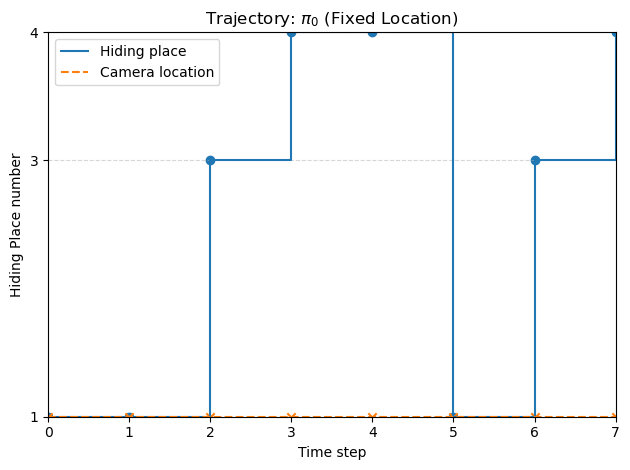

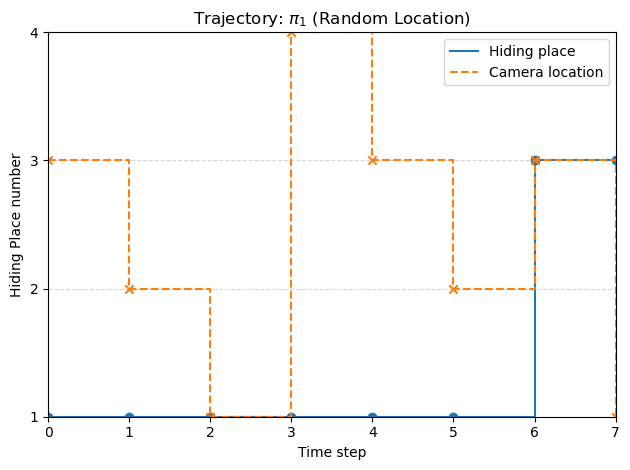

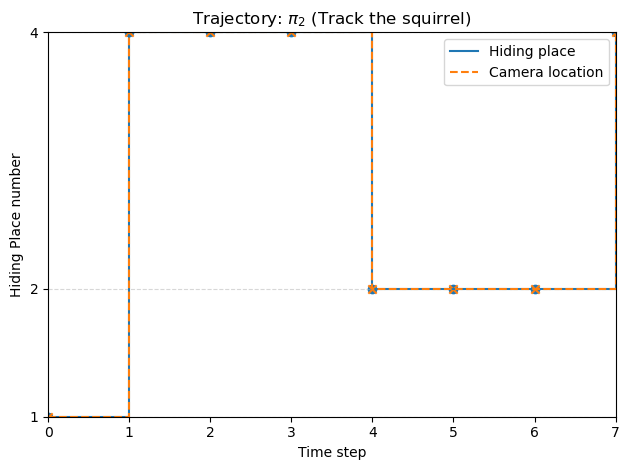

In [4]:
# Evaluate policies
cost_pi_0, std_pi_0 = estimate_cost(pi_0)
cost_pi_1, std_pi_1 = estimate_cost(pi_1)
cost_pi_2, std_pi_2 = estimate_cost(pi_2)

print("Expected total cost:")
print(f"$\pi_0$ (Fixed location): {cost_pi_0:.2f} +- {std_pi_0:.2f}")
print(f"$\pi_1$ (Random): {cost_pi_1:.2f} +- {std_pi_1:.2f}")
print(f"$\pi_2$ (Tracking): {cost_pi_2:.2f} +- {std_pi_2:.2f}")

# Plot one trajectory from each
traj_0, acts_0, _ = simulate(pi_0)
traj_1, acts_1, _ = simulate(pi_1)
traj_2, acts_2, _ = simulate(pi_2)

plot_trajectory(traj_0, acts_0, "Trajectory: $\pi_0$ (Fixed Location)")
plot_trajectory(traj_1, acts_1, "Trajectory: $\pi_1$ (Random Location)")
plot_trajectory(traj_2, acts_2, "Trajectory: $\pi_2$ (Track the squirrel)")

### C) Backward iteration 

In [5]:
# Initialize value function
V = np.zeros((H+1, len(S)))
policy = np.zeros((H, len(S)), dtype=int)

# Backward iteration
for h in range(H - 1, -1, -1):
    for s in S:        
        min_cost = float('inf')
        best_action = None
            
        for a in A:
            expected_cost = cost(s, a)
                
            # Compute expected value based on transition probabilities
            for s_prime in S:
                p = transition_prob(s, a, s_prime)
                expected_cost += p * V[h + 1, s_prime - 1]
                
            # Choose action that minimizes cost
            if expected_cost < min_cost:
                min_cost = expected_cost
                best_action = a
                    
        V[h, s - 1] = min_cost
        policy[h, s - 1] = best_action

states = [1, 2, 3, 4]
dv = pd.DataFrame(V, columns=[f"s={s}" for s in states])
df = pd.DataFrame(policy, columns=[f"s={s}" for s in states])
dv.index = [f"h={h}" for h in range(V.shape[0])]
df.index = [f"h={h}" for h in range(policy.shape[0])]

print("Value function:")
print(dv)  

print("Optimal policy:")
print(df)


Value function:
     s=1  s=2  s=3  s=4
h=0  0.0  0.0  0.0  0.0
h=1  0.0  0.0  0.0  0.0
h=2  0.0  0.0  0.0  0.0
h=3  0.0  0.0  0.0  0.0
h=4  0.0  0.0  0.0  0.0
h=5  0.0  0.0  0.0  0.0
h=6  0.0  0.0  0.0  0.0
h=7  0.0  0.0  0.0  0.0
Optimal policy:
     s=1  s=2  s=3  s=4
h=0    1    2    3    4
h=1    1    2    3    4
h=2    1    2    3    4
h=3    1    2    3    4
h=4    1    2    3    4
h=5    1    2    3    4
h=6    1    2    3    4


Backward finite horizon dynamic programming explicitly provides the value function $V_H=0$ and the optimal policy which consists in moving the camera in front of the squirrel's hiding place achieves this null total cost. 


## 2) Squirrel example as a finite state and action POMDP 

### A) The model

Now consider you do not fully observe the trajectory of the squirrel. You only observe the presence of the squirrel when the location of the camera corresponds to the squirrel's location. Even then, the time spent by the squirrel in its hiding place remains hidden to you. Denote by $\omega_t= \mathbb{1}_{a_t=m_t}$ the observation at time $t$, *i.e* $1$ if the squirrel is in the same place as your camera, $0$ otherwise. The objective remains the same, *i.e* maximizing the number of pictures of the squirrel taken over the span of the week. 

The POMDP associated to this example builds on that of Section 1 with the additional quantities, assuming that $b_0$ is the stationary distribution of the transition matrix of the MDP squirrel model, which is independent of the control: 

\begin{align*}
    \Omega&=\{0, 1\}, \\
    O(s'=(m'),a,\omega)&= \mathbb{1}_{\{a=m'\}} \mathbb{1}_{\{\omega=1\}} + \mathbb{1}_{\{a\neq m'\}} \mathbb{1}_{\{\omega=0\}}. 
    %b_0(m), & \forall s=(m)\in \{1,\cdots,4\} \\
%    c(s,a)&= \1_{a \neq m}; \qquad C(s)=0.
\end{align*}


We assume that the camera has just observed the arrival of the squirrel in  site $m_0\in\{1,...,4\}$. 
Therefore, $b_0(m_0)=1$ and $b_0(m)=0$ for all pairs $(m)$ different from $(m_0)$.

As previously, we encode the POMDP model by specifying its key components: the set of observations, belief state initialisation and updates.


In [6]:
# Observation space
Omega = [0,1]

def observation_prob(s_prime, a, omega):
    """Compute the observation probability O(s', a, omega)."""
    if s_prime == a: 
        return 1 if omega == 1 else 0
    
    else: 
        return 1 if omega == 0 else 0
    
def get_obs(s_prime, a):
    """Compute the observation probability O(s', a, omega)."""
    
    return 1 if s_prime == a else 0

def initialize_belief(m0):
    """Initialize the belief state b_0."""
    
    belief = {}
    
    # All other possible (m, z) pairs get 0
    for s in S:
        belief[s] = 0
            
    # Initial belief: fully certain at (m0)
    belief[m0] = 1
    
    return belief

def update_belief(belief, a, omega):
    """Update the belief state given action a and observation omega."""
    
    new_belief = {}

    for s_prime in S:
        obs_prob = observation_prob(s_prime, a, omega)
        total = 0.0
        for s in S:
            trans_p = transition_prob(s, a, s_prime)                
            total += trans_p * belief[s]
        
        new_belief[s_prime] = obs_prob * total

    # Recalibration: the values are adjusted so that their sum is 1
    total_prob = sum(new_belief.values())
    EPSILON = 1e-12

    if total_prob > EPSILON:
        for key in new_belief:
            if new_belief[key]>EPSILON:
                new_belief[key] /= total_prob
        
    return new_belief

### B) Example of policy

We illustrate belief update through different trajectories simulation. Let's introduce three policies to control the process above. 

**Random Movement (Stochastic Policy) $\pi_0$**. The camera moves randomly and looks at one of the four possible hiding spots.

**Last Seen (Stochastic history-dependant Policy) $\pi_1$**. Stick to the last observed location of the squirrel until evidence suggests otherwise.

**Max Belief (Determinist Policy) $\pi_2$**. Move the camera to the site where the belief of squirrel presence is the highest.

In [7]:
def pi_0(omega_old, action_old, omega, belief):
    """pi1: Random movement."""
    return np.random.choice(A)

def pi_1(omega_old, action_old, omega, belief):
    """pi2: Treat if biomarker increases."""
    if omega_old == 1:
        return action_old
    else: 
        return np.random.choice([a for a in A if a != action_old])
    
def pi_2(omega_old, action_old, omega, belief):
    """
    pi_max_belief: Choose the action that maximizes the belief of the squirrel's location.
    """
    # Find the state with the highest belief
    best_state = max(belief, key=belief.get)
    
    return best_state

    
def simulate(policy, m0=1, horizon=H):
    """Simulate a full trajectory under a policy with observation and belief updates."""
    
    # True hidden state (squirrel's location)
    s = m0                        
    belief = initialize_belief(m0)
    
    trajectory = []
    actions = []
    observations = []
    beliefs = []
    costs = []

    omega_old = None
    action_old = None

    for _ in range(horizon + 1):
        # Select action based on previous info
        if omega_old is None:
            a = policy(1, 1, 0, belief)  # Dummy initial input
        else:
            a = policy(omega_old, action_old, omega, belief)

        # Environment transition
        omega = get_obs(s, a)  # Observation: 1 if camera sees the squirrel

        # Log current state
        trajectory.append(s)
        actions.append(a)
        observations.append(omega)
        beliefs.append(belief.copy())
        costs.append(cost(s, a))

        # Update belief
        belief = update_belief(belief, a, omega)

        # Transition to next hidden state
        s = next_state(s, a)

        # Update memory
        omega_old = omega
        action_old = a

    return trajectory, actions, observations, beliefs, costs

def estimate_cost(policy, n_sim=5000):
    """Estimate Monte-Carlo cost of a policy"""
    total = []
    for _ in range(n_sim):
        _, _, _, _, costs = simulate(policy)
        total.append(sum(costs))
    return np.mean(total), np.std(total) 

In [8]:
# Evaluate policies
cost_pi_0, std_pi_0 = estimate_cost(pi_0)
cost_pi_1, std_pi_1 = estimate_cost(pi_1)
cost_pi_2, std_pi_2 = estimate_cost(pi_2)

print("Expected total cost:")
print(f"$\pi_0$ (Random): {cost_pi_0:.2f} +- {std_pi_0:.2f}")
print(f"$\pi_1$ (Last Seen): {cost_pi_1:.2f} +- {std_pi_1:.2f}")
print(f"$\pi_2$ (Max Belief): {cost_pi_2:.2f} +- {std_pi_2:.2f}")

Expected total cost:
$\pi_0$ (Random): 6.02 +- 1.22
$\pi_1$ (Last Seen): 4.81 +- 1.33
$\pi_2$ (Max Belief): 4.78 +- 1.35


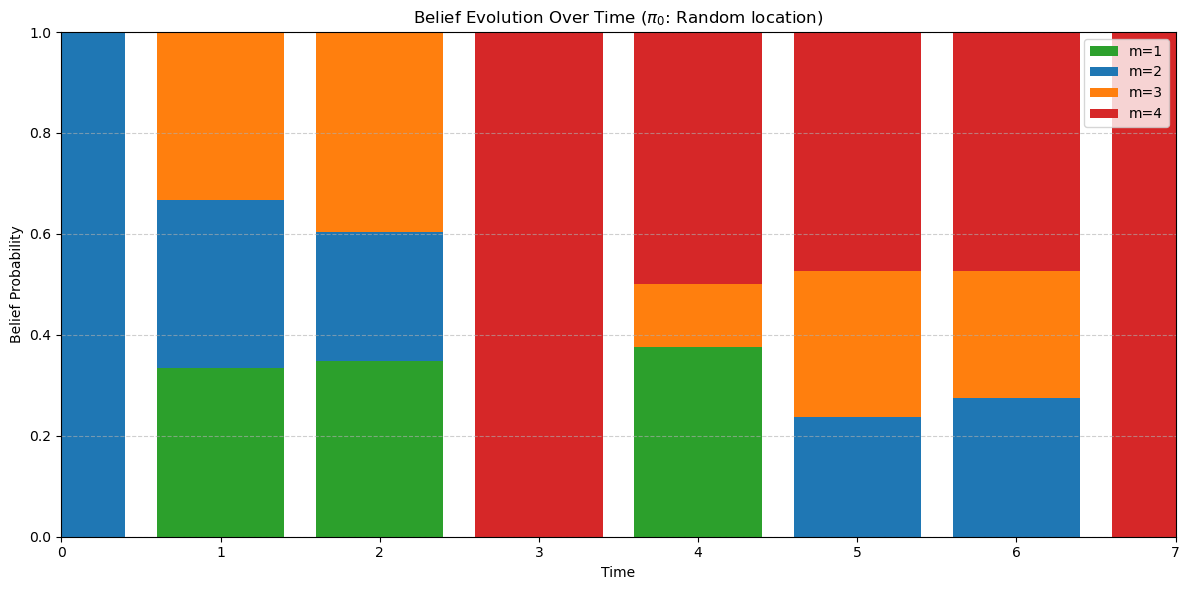

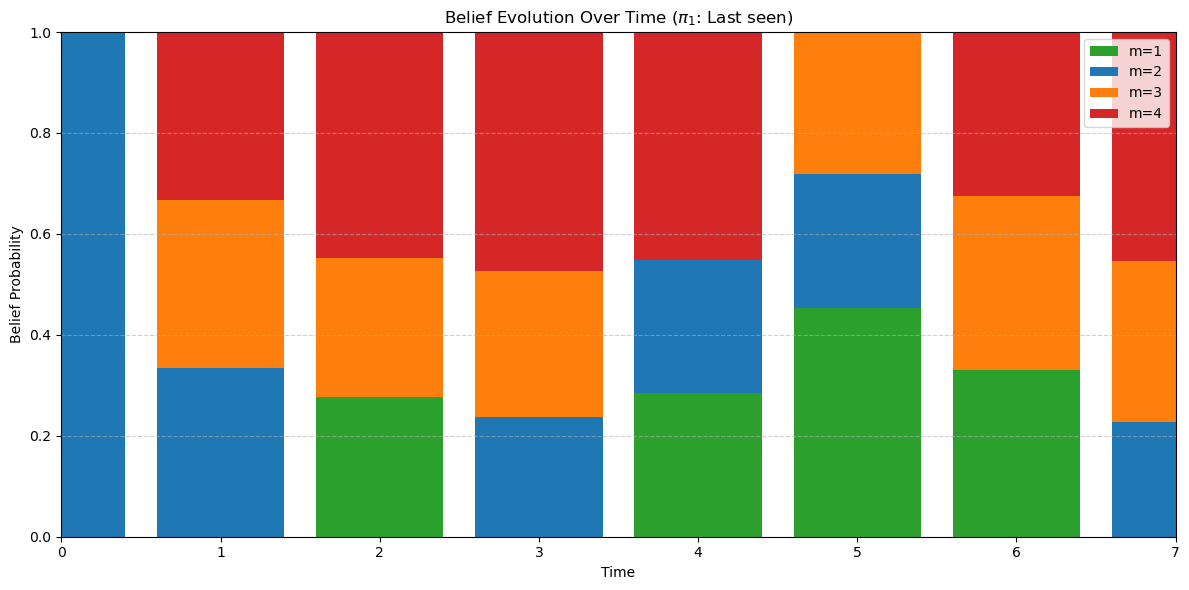

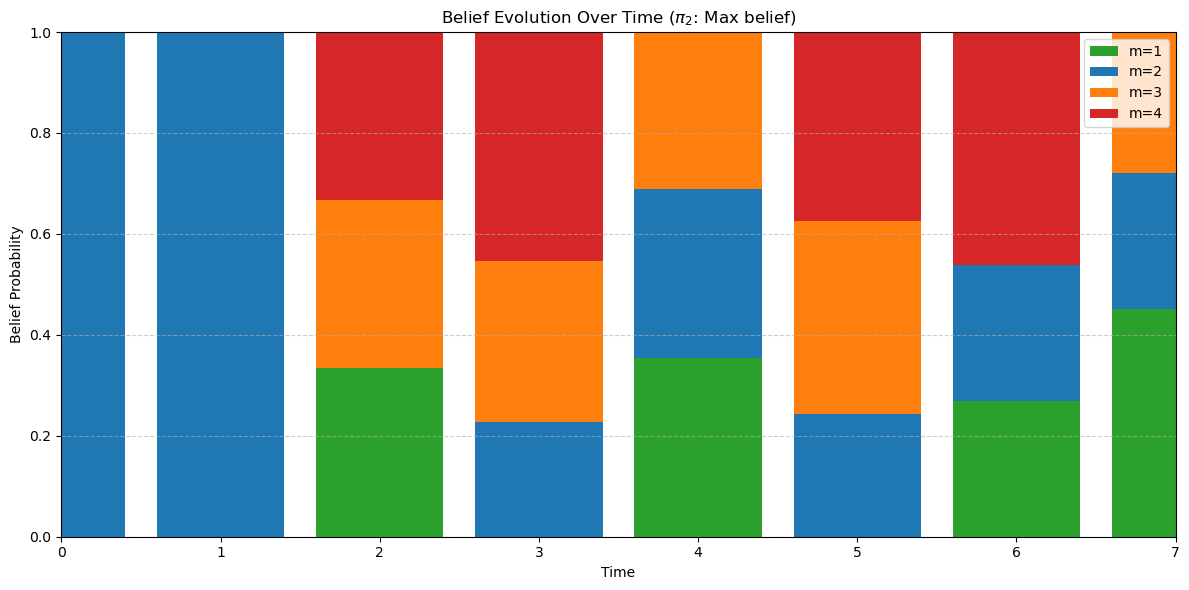

In [9]:
def plot_belief_evolution_heatmaps(beliefs, title="Belief Evolution Over Time"):
    """
    Plot belief evolution over time using stacked bar plots.
    Each bar represents a time step and is divided into 4 segments: P(m=1), ..., P(m=4)
    """
    T = len(beliefs)
    S = [1, 2, 3, 4]
    state_beliefs = {s: np.zeros(T) for s in S}

    for t, belief in enumerate(beliefs):
        for s in S:
            state_beliefs[s][t] = belief.get(s, 0)

    # Prepare stacked values
    bottoms = np.zeros(T)
    x = np.arange(T)
    plt.figure(figsize=(12, 6))

    colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:red']
    for idx, s in enumerate(S):
        plt.bar(x, state_beliefs[s], bottom=bottoms, label=f'm={s}', color=colors[idx])
        bottoms += state_beliefs[s]

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Belief Probability")
    plt.ylim(0, 1)
    plt.xlim(0, T - 1)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

_, _, _, beliefs_pi0, _ = simulate(pi_0, m0=2, horizon=7)
_, _, _, beliefs_pi1, _ = simulate(pi_1, m0=2, horizon=7)
_, _, _, beliefs_pi2, _ = simulate(pi_2, m0=2, horizon=7)

plot_belief_evolution_heatmaps(beliefs_pi0, title = "Belief Evolution Over Time ($\pi_0$: Random location)")
plot_belief_evolution_heatmaps(beliefs_pi1, title = "Belief Evolution Over Time ($\pi_1$: Last seen)")
plot_belief_evolution_heatmaps(beliefs_pi2, title = "Belief Evolution Over Time ($\pi_2$: Max belief)")

### C) POUCT

The **POUCT (Partially Observable Upper Confidence Tree)** algorithm is a Monte Carlo Tree Search (MCTS)-based method used to solve POMDP. It combines both planning and learning to efficiently explore and estimate the best action by building a tree of possible future states, updating it with the results of simulated trajectories.

In this work, we leverage the implementation of the POUCT algorithm provided by the [**pomdp_py**](https://h2r.github.io/pomdp-py/html/examples.tiger.html) package. This package offers a robust framework for solving POMDPs and enables easy integration with various solvers, including POUCT.

In [10]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pomdp_py

import pomdp_py

To use the algorithms provided by the [**pomdp_py**](https://h2r.github.io/pomdp-py/html/examples.tiger.html) package, we first need to implement our model within the appropriate class structure expected by the framework. The following code is an adaptation of the [*Tiger example*](https://h2r.github.io/pomdp-py/html/examples.tiger.html) provided in the [**pomdp_py**](https://h2r.github.io/pomdp-py/html/examples.tiger.html) package, modified to suit our Squirrel example.

Please, note that is package is build in reward framework and not cost anymore. For this section, the purpose is now to maximize a reward. 

In [11]:
# STEP 1: DEFINE THE DOMAIN
# Define State, Action, Observation classes
class State(pomdp_py.State):
    def __init__(self, m):
        self.m = m
        self.name = (m)  # unique ID for state
        
    def __hash__(self):
        return hash((self.m))
    
    def __eq__(self, other):
        return isinstance(other, State) and self.name == other.name
    
    def __str__(self):
        return f"State(m={self.m})"

    def __repr__(self):
        return str(self)
    
    def __iter__(self):
        return iter((self.m))

class Action(pomdp_py.Action):
    def __init__(self, a):
        if a not in [1,2,3,4]:
            raise ValueError("Invalid action: %d" % a)
        self.a = a
        self.name=str(a)
    
    def __hash__(self):
        return hash(self.a)

    def __eq__(self, other):
        return isinstance(other, Action) and self.a == other.a

    def __str__(self):
        return f"Action({self.a})"

    def __repr__(self):
        return self.__str__()

class Observation(pomdp_py.Observation):
    def __init__(self, y):
        self.y = y
        self.o = (y)  # unique ID for state
        
    def __hash__(self):
        return hash(self.o)

    def __eq__(self, other):
        return isinstance(other, Observation) and self.o == other.o

    def __str__(self):
        return f"Obs(y={self.y})"

    def __repr__(self):
        return self.__str__()
    
# STEP 2: DEFINE THE MODEL
class ObservationModel(pomdp_py.ObservationModel):
    def probability(self, observation, next_state, action):
        """Get observation probability O(s'|a,omega)"""
        return observation_prob(next_state.m, action.a, observation.y)
        
    def sample(self, next_state, action):
        """From s' sample a possible observation omega"""
        # Simple probabilistic sampling example
        y = get_obs(next_state.m, action.a)
        return Observation(y)
    
    def get_all_observations(self):
        """Only need to implement this if you're using
        a solver that needs to enumerate over the observation
        space (e.g. value iteration)"""
        obs_set = set()
        obs_set.add(Observation(0))
        obs_set.add(Observation(1))
        return list(obs_set)
    

class TransitionModel(pomdp_py.TransitionModel):
    def probability(self, next_state, state, action):
        return transition_prob(state.m, action.a, next_state.m)

    def sample(self, state, action):
        """Sample a next state s' from P(s' | s, a)"""
        s_prime =  np.random.choice([1, 2, 3, 4], p=P[state.m-1,:])
        return State(s_prime)
    
    def get_all_states(self):
        """Return all possible states (m, z, t).
        Only need to implement this if you're using
        a solver that needs to enumerate over the
        observation space (e.g. value iteration)"""
        all_states = []
        for m in range(1,5):
            all_states.append(State(m))
        return all_states
    
class RewardModel(pomdp_py.RewardModel):
    def _reward_func(self, state, action):
        return -cost(state.m, action.a)

    def sample(self, state, action, next_state):
        # deterministic
        return self._reward_func(state, action)
    
# STEP 3: DEFINE THE SET OF AVAILABLE ACTIONS 
class PolicyModel(pomdp_py.RolloutPolicy):
    """Simple rollout policy for cancer POMDP with actions 0 and 1 (always available)"""
    ACTIONS = [Action(1), Action(2), Action(3), Action(4)]

    def sample(self, state):
        """Samples a random action"""
        return random.choice(self.ACTIONS)

    def rollout(self, state, *args):
        """Treating this PolicyModel as a rollout policy"""
        return self.sample(state)

    def get_all_actions(self, state=None, history=None):
        """Returns the full action space"""
        return self.ACTIONS
    
# STEP 4: DEFINE THE POMDP Model (optional step)
class SquirrelProblem(pomdp_py.POMDP):

    def __init__(self, init_true_state, init_belief):
        """init_belief is a Distribution."""
        agent = pomdp_py.Agent(init_belief,
                               PolicyModel(),
                               TransitionModel(),
                               ObservationModel(),
                               RewardModel())
        env = pomdp_py.Environment(init_true_state,
                                   TransitionModel(),
                                   RewardModel())
        super().__init__(agent, env, name="CancerProblem")
        
    def state_transition(self, action, execute=True):
        """state_transition(self, action, execute=True, **kwargs)

            Overriding parent class function.
            Simulates a state transition given `action`. If `execute` is set to True,
            then the resulting state will be the new current state of the environment.

            Args:
                action (Action): action that triggers the state transition
                execute (bool): If True, the resulting state of the transition will
                                become the current state.

            Returns:
                float or tuple: reward as a result of `action` and state
                transition, if `execute` is True (next_state, reward) if `execute`
                is False.

            """
        
        reward = self.reward_model.sample(
        self.state, action, None
        )
        
        next_state = copy.deepcopy(self.state)
        next_state = self.transition_model.sample(
            self.state, action
        )

        if execute:
            self.apply_transition(next_state)
            return reward
        else:
            return next_state, reward

def test_planner(squirrel_problem, planner, nsteps=3):
    """Runs the action-feedback loop of Cancer POMDP"""

    for i in range(nsteps):
        print(f"\n==== Step {i+1} ====")
        print("True state:", squirrel_problem.env.state)
        #print("Belief:", squirrel_problem.agent.cur_belief)

        # Step 2: Plan action using current belief
        action = planner.plan(squirrel_problem.agent)

        print("Action:", action)
        
        # Step 3: Get reward (assuming no control over state transition here)
        #reward = cancer_problem.env.reward_model.sample(
        #    cancer_problem.env.state, action, None
        #)
        reward = squirrel_problem.env.state_transition(action, execute=True)
        print("True next state:", squirrel_problem.env.state)
        print("Reward:", reward)
        
        # Step 4: Simulate real observation from environment
        real_observation = squirrel_problem.agent.observation_model.sample(
            squirrel_problem.env.state, action
        )
        
        print(">> Observation:", real_observation)

        # Step 5: Update belief
        squirrel_problem.agent.update_history(action, real_observation)
        planner.update(squirrel_problem.agent, action, real_observation)

        if isinstance(planner, pomdp_py.POUCT):
            print("Num sims:", planner.last_num_sims)
            
        # Optional: manually update histogram belief if needed
        if isinstance(squirrel_problem.agent.cur_belief, pomdp_py.Histogram):
            new_belief = pomdp_py.update_histogram_belief(
                squirrel_problem.agent.cur_belief,
                action,
                real_observation,
                squirrel_problem.agent.observation_model,
                squirrel_problem.agent.transition_model
            )
            squirrel_problem.agent.set_belief(new_belief)
            
# The first state is always the patient in remission at time 0
init_true_state = State(1)

# Construct full state space
init_belief_dict = {State(m): prob for m, prob in initialize_belief(init_true_state.m).items()}


# Initialize histogram belief
init_belief = pomdp_py.Histogram(init_belief_dict)

# Then, we can create an instance of the Cancer problem:
squirrel_problem = SquirrelProblem(init_true_state, init_belief)

# Step 1; in main()
# creating planners
pouct = pomdp_py.POUCT(max_depth=20, 
                       discount_factor=0.2,
                       planning_time=.9, 
                       exploration_const=110,
                       rollout_policy=squirrel_problem.agent.policy_model)



==== Step 1 ====
True state: State(m=1)
Action: Action(1)
True next state: State(m=1)
Reward: 0.0
>> Observation: Obs(y=1)

==== Step 2 ====
True state: State(m=1)
Action: Action(1)
True next state: State(m=4)
Reward: 0.0
>> Observation: Obs(y=0)

==== Step 3 ====
True state: State(m=4)
Action: Action(3)
True next state: State(m=1)
Reward: -1.0
>> Observation: Obs(y=0)

==== Step 4 ====
True state: State(m=1)
Action: Action(4)
True next state: State(m=4)
Reward: -1.0
>> Observation: Obs(y=1)

==== Step 5 ====
True state: State(m=4)
Action: Action(4)
True next state: State(m=4)
Reward: 0.0
>> Observation: Obs(y=1)

==== Step 6 ====
True state: State(m=4)
Action: Action(4)
True next state: State(m=1)
Reward: 0.0
>> Observation: Obs(y=0)

==== Step 7 ====
True state: State(m=1)
Action: Action(1)
True next state: State(m=1)
Reward: 0.0
>> Observation: Obs(y=1)

Total reward over 7 steps: -2.000


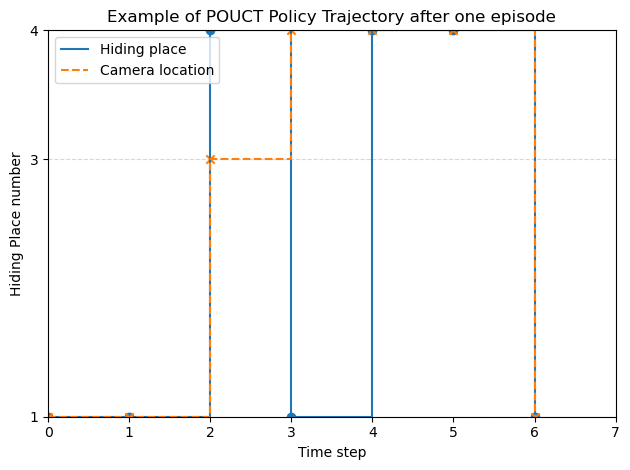

In [12]:
def run_and_plot_trajectory(squirrel_problem, planner, nsteps=7):
    """Run planner, collect trajectory, plot it, and compute mean reward."""
    
    trajectory = []
    actions = []
    rewards = []

    for i in range(nsteps):
        print(f"\n==== Step {i+1} ====")
        print("True state:", squirrel_problem.env.state)
        trajectory.append(squirrel_problem.env.state.m)

        # Plan action
        action = planner.plan(squirrel_problem.agent)
        print("Action:", action)
        actions.append(action.a)

        # State transition and reward
        reward = squirrel_problem.env.state_transition(action, execute=True)
        print("True next state:", squirrel_problem.env.state)
        print("Reward:", reward)
        rewards.append(reward)

        # Simulate observation
        real_observation = squirrel_problem.agent.observation_model.sample(
            squirrel_problem.env.state, action
        )
        print(">> Observation:", real_observation)
        
        # Update belief and planner
        squirrel_problem.agent.update_history(action, real_observation)
        planner.update(squirrel_problem.agent, action, real_observation)

        # Update belief if using Histogram
        if isinstance(squirrel_problem.agent.cur_belief, pomdp_py.Histogram):
            new_belief = pomdp_py.update_histogram_belief(
                squirrel_problem.agent.cur_belief,
                action,
                real_observation,
                squirrel_problem.agent.observation_model,
                squirrel_problem.agent.transition_model
            )
            squirrel_problem.agent.set_belief(new_belief)
            
    print(f"\nTotal reward over {nsteps} steps: {sum(rewards):.3f}")

    # Plot trajectory
    plot_trajectory(trajectory, actions, title="Example of POUCT Policy Trajectory after one episode")

# Run and plot
run_and_plot_trajectory(squirrel_problem, pouct, nsteps=7)


In [13]:
def run_multiple_episodes(squirrel_problem_factory, planner_factory, nsteps=7, nepisodes=50):
    total_rewards = []
    all_trajectories = []
    
    for ep in range(nepisodes):
        # print(f"\n=== Episode {ep+1} ===")
        squirrel_problem = squirrel_problem_factory()
        planner = planner_factory()
        
        trajectory = []
        rewards = []
        
        for _ in range(nsteps):
            action = planner.plan(squirrel_problem.agent)
            reward = squirrel_problem.env.state_transition(action, execute=True)
            observation = squirrel_problem.agent.observation_model.sample(
                squirrel_problem.env.state, action
            )
            squirrel_problem.agent.update_history(action, observation)
            planner.update(squirrel_problem.agent, action, observation)
            
            trajectory.append((squirrel_problem.env.state.m, action.a))
            rewards.append(reward)
        
        total_rewards.append(sum(rewards))
        all_trajectories.append(trajectory)
    
    mean_reward = sum(total_rewards) / nepisodes
    # print(f"\nMean reward over {nepisodes} episodes: {mean_reward:.3f}")
    return all_trajectories, total_rewards

# These factories make sure each episode starts fresh
def make_squirrel_problem():
    init_true_state = State(1)
    init_belief_dict = {State(m): prob for m, prob in initialize_belief(init_true_state.m).items()}
    init_belief = pomdp_py.Histogram(init_belief_dict)
    return SquirrelProblem(init_true_state, init_belief)

def make_pouct():
    return pomdp_py.POUCT(max_depth=20, discount_factor=0.2,
                          planning_time=0.9, exploration_const=110,
                          rollout_policy=PolicyModel())

total_rewards = []
for run in range(10):
    print(f"\n===== RUN {run+1} =====")
    trajectories, rewards = run_multiple_episodes(make_squirrel_problem, make_pouct, nsteps=7, nepisodes=10)
    total_rewards.append(rewards)

print(f"\nMean reward over {10} run of {10} episodes: {np.mean(total_rewards):.3f} +- {np.std(total_rewards):.3f}")



===== RUN 1 =====

===== RUN 2 =====

===== RUN 3 =====

===== RUN 4 =====

===== RUN 5 =====

===== RUN 6 =====

===== RUN 7 =====

===== RUN 8 =====

===== RUN 9 =====

===== RUN 10 =====

Mean reward over 10 run of 10 episodes: -4.140 +- 1.364


## 3) Squirrel example as a BAMDP

### A) The model

Going back to the MDP squirrel example, we now suppose that the  $p_{m}^{m^{\prime}}$ are unknown for all $s, s^{\prime} \in \mathbb{S}$.  
    
To model the uncertainty on these transitions, we use the standard Multinomial/Dirichlet approach 
$$(p_{m}^1,p_{m}^2,p_{m}^3,p_{m}^4) \sim Dirichlet(\theta_{m}^1,\theta_{m}^2,\theta_{m}^3,\theta_{m}^4).$$

With each new observation, we update the a posteriori distribution of the parameters of the transition matrix $\theta' = \theta + \Delta$, where $\Delta=e_m^{m'}$ is the matrix in $\mathbb{N}^4\times\mathbb{N}^4$ that has a value of $1$ at the position corresponding to the observed mode $m$ and new mode $m'$, while other entries are $0$. 
Let us illustrate the update process with an example. 
Suppose that at time $t$, the squirrel is in hiding place $s = 1$.
At this stage, the hyperparameter vector $\theta$ is, for instance,
    \[
    \theta = 
    \begin{bmatrix}
    2 & 7 & 6 & 3 \\
    3 & 4 & 1 & 2 \\
    1 & 5 & 8 & 1 \\
    3 & 2 & 6 & 3
    \end{bmatrix}
    \]
At the next step, the squirrel transitions into the hiding place $s'=3$ while the camera is located at $a=2$. 
This observation corresponds to the state-action-state sequence $s = 1, a=2, s'=3$.
In this case, the parameter $\theta_1^3$ of the Dirichlet distribution is updated.
The hyperparameter matrix $\theta$ is updated as follows
\[
\theta' =
\left[
\begin{array}{c}
\begin{bmatrix}
2 & 7 & 6 & 3 \\
3 & 4 & 1 & 2 \\
1 & 5 & 8 & 1 \\
3 & 2 & 6 & 3
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
2 & 7 & 7 & 3 \\
3 & 4 & 1 & 2 \\
1 & 5 & 8 & 1 \\
3 & 2 & 6 & 3
\end{bmatrix}
\end{array}
\right]
\]

The BAMDP associated with this example builds on the MDP. 
It is defined by adding:

\begin{align*}
        \tilde{\mathbb{S}}&=\mathbb{S} \times \{0, \cdots, H\}^{16}, \\
        \tilde{\mathbb{A}}&= \mathbb{A}, \\
        \tilde{P}&=\frac{\theta_{m'}^0}{\sum_{m=1}^4\theta_{m}^1+\theta_{m}^2+\theta_{m}^3+\theta_{m}^4}\mathbb{1}_{\theta'=\theta+e_m^{m'}}, \\
        \tilde{c}&= c.
\end{align*}



In [14]:
# Transition probabilities
def transition_prob(s, a, s_prime, theta, theta_prime):
    """
    Compute the BAMDP transition probability from state s to s_prime 
    under action a, given prior theta and updated theta_prime.
    
    Parameters:
        s (int): Current state (1-based index).
        a (int): Action taken (1-based index, not used directly here but included for interface consistency).
        s_prime (int): Next state (1-based index).
        theta (np.ndarray): Prior Dirichlet parameter matrix (shape: [4, 4]).
        theta_prime (np.ndarray): Updated Dirichlet parameter matrix (should be theta + e_m^m').

    Returns:
        float: Transition probability according to BAMDP model.
    """
    # Convert 1-based to 0-based indexing
    m = s - 1      # mode before transition
    m_prime = s_prime - 1  # mode after transition

    # Check if the update is consistent: theta_prime == theta + e_m^m'
    delta = np.zeros_like(theta)
    delta[m, m_prime] = 1
    expected_theta_prime = theta + delta

    if np.array_equal(theta_prime, expected_theta_prime):
        # Compute transition probability using Dirichlet mean
        numerator = theta[m, m_prime]
        denominator = np.sum(theta[m, :])
        return numerator / denominator
    else:
        return 0.0  # Transition not valid under this update

# Transition probabilities
def simulate_state(s, a, theta):
    """
    Compute the next state based on the defined MDP.
    
    Parameters:
        s (int): Current state (1-based index).
        s_prime (int): Next state (1-based index).
        theta (np.ndarray): Prior Dirichlet parameter matrix (shape: [4, 4]).
        
    Returns:
        tuple: s_prime (int): Next state (1-based index) and 
               theta_prime (np.ndarray): Updated Dirichlet parameter matrix (should be theta + e_m^m').
    """
    
    theta_prime = theta
    
    p_1 = theta[s-1, 0]/np.sum(theta[s - 1, :])
    p_2 = theta[s-1, 1]/np.sum(theta[s - 1, :])
    p_3 = theta[s-1, 2]/np.sum(theta[s - 1, :])
    p_4 = theta[s-1, 3]/np.sum(theta[s - 1, :])
    
    s_prime =  np.random.choice([1, 2, 3, 4], p=[p_1, p_2, p_3, p_4])
    
    theta_prime[s-1,s_prime-1]  += 1

    return s_prime, theta_prime



### B) BAMCP

BAMCP (Bayes-Adaptive Monte Carlo Planning) is a Monte Carlo Tree Search (MCTS)-based algorithm. It combines Bayesian inference and planning by sampling possible models from the agent’s belief, simulating future trajectories under those models, and building a search tree to estimate the best action. 

In [15]:
# BAMCP planner
def bamcp(plan_horizon, belief, max_rollouts=1000):
    best_action = None
    best_value = float('inf')  # We minimize cost
    
    for a_try in A:
        total_value = 0

        for _ in range(max_rollouts):
            s, theta = belief
            m = current_state = s
            current_theta = theta
            total_cost = 0

            for t in range(plan_horizon):
                # Choose action
                a = a_try if t == 0 else random.choice(A)
                
                # Simulate transition
                next_state, theta_prime = simulate_state(current_state, a, current_theta)
                total_cost += cost(current_state, a)

                #total_cost += reward

                current_state = next_state
                current_theta = theta_prime

            total_value += total_cost

        avg_value = total_value / max_rollouts

        if avg_value < best_value:
            best_value = avg_value
            best_action = a_try

    return best_action

### C) Use of BAMCP

Since BAMCP is an online algorithm, we will now show the simulation of a single trajectory.

In [16]:
def simulate_bamcp_trajectory(initial_belief, horizon=50, max_rollouts=500):
    """Simulate a trajectory using BAMCP policy."""
    s, theta = initial_belief
    trajectory = []
    total_cost = 0

    for step in range(horizon):
        # Choose the best action using BAMCP
        a = bamcp(plan_horizon=5, belief=(s, theta), max_rollouts=max_rollouts)

        # Apply the action to get next state and updated theta
        next_s, next_theta = simulate_state(s, a, theta)

        # Get cost
        step_cost = cost(s, a)
        total_cost += step_cost

        # Log transition
        trajectory.append({
            "step": step,
            "state": s,
            "action": a,
            "cost": step_cost,
            "next_state": next_s,
            "theta": theta
        })

        # print(f"Step {step}: state={s}, action={a}, cost={step_cost}, next={next_s}, theta={theta}")

        # Move to next
        s, theta = next_s, next_theta
        
    return trajectory, total_cost




 Total trajectory cost: 0


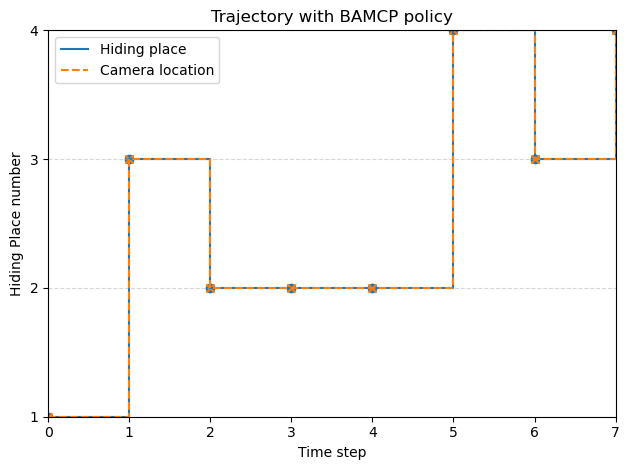

In [17]:
# Initial belief
initial_state = 1
initial_theta = np.ones((4, 4), dtype=int)
initial_belief = (initial_state, initial_theta)

trajectory, total_cost = simulate_bamcp_trajectory(initial_belief, horizon=8, max_rollouts=10)

print(f"\n Total trajectory cost: {total_cost}")

filtered_traj = [entry for entry in trajectory if entry["action"] is not None]
hiding_place = [entry["state"] for entry in filtered_traj]
actions = [entry["action"] for entry in filtered_traj]

plot_trajectory(hiding_place, actions, title="Trajectory with BAMCP policy")

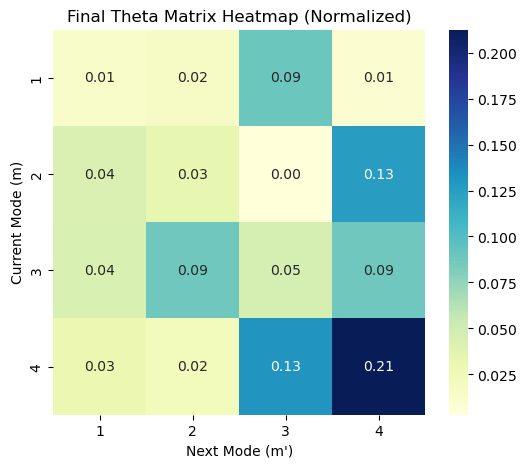

In [18]:
# Get the last theta from the trajectory
last_theta = trajectory[-1]["theta"]

# Normalize the matrix so it sums to 1
theta_normalized = last_theta / np.sum(last_theta)

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(theta_normalized, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])

plt.title("Final Theta Matrix Heatmap (Normalized)")
plt.xlabel("Next Mode (m')")
plt.ylabel("Current Mode (m)")
plt.show()

## 4) Squirrel example as a BAPOMDP

Going back to the BAMDP example, we now consider you do not fully observe the trajectory of the squirrel as presented in example. 
You only observe the presence of the squirrel when the location of the camera corresponds to the squirrel's location with a certain probability.
The new observation function associated with this example is:
\begin{align*}
    O(s'=(m',r'),a,\omega)&= \sum_{\omega=0}^1 p_0^{\omega}\mathbb{1}_{\{a=m'\}} + p_1^{\omega} \mathbb{1}_{\{\omega=0\}}. 
\end{align*}

We assume $p = (p_0^0, p_0^1, p_1^0, p_1^1)$ is unknow.
The parameters of the observation model are given by 

$$ p \sim Dirichlet(\psi_0^0,\psi_0^1, \psi_1^0, \psi_1^1),$$ 
with $(\psi_i^j)_{0:1}^{0:1} \in \Psi\subset \mathbb{N}^{4}$.

The update of the parameters for $\psi$ is similar to that of the parameters for $\theta$. 
With each new observation $(s',a,\omega)$, we update the posterior distribution of the parameters of the transition matrix, so that $\psi' = \psi + \Delta$ is a counting matrix, where $\Delta=e_{i}^j$ is the matrix in $\mathbb{N}^2\times\mathbb{N}^2$ that has a value of $1$ at the position corresponding to $i=\mathbb{1}{a\neq m'}$, $j=\omega$ and $0$ elsewhere, for $s'=(m')$ and $\omega$. 

This BAPOMDP is therefore equivalent to a POMDP on a larger state-space.
As in the classic POMDP formalism, this uncertainty can be represented using regular POMDP formalism, by maintaining (and updating) a belief over these count vectors.
